# Erasmus Data Analysis and Visualization

Today I will work with this erasmus dataset. Inside, we can find these columns :

* INDEX: Unique index number of each record.
* COUNTRIES: Countries to be attended under Erasmus programme
* UNIVERSITIES: Universities to be attended under the Erasmus programme
* FACULTIES: Faculties where the students are enrolled
* DEPARTMENTS: Departments where the students are enrolled
* EXAM SCORE: Students' Erasmus exam scores
* GRANT: Column indicating whether the students received a grant (1: received, 0: not received)

I will perform some data cleaning, data analysis and visualization

## It's one of my first data project, so feel free to give me advices so I can get better ! Thank you ! 

# Data Importation and Cleaning

In [1]:
#import extensions

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('/kaggle/input/exam-and-grant-data-of-erasmus-applicants/erasmus.csv')

#Remove INDEX column
df.drop(['INDEX'], axis=1, inplace=True)

df.head()

,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
0,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [3]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('string')

df.dtypes

COUNTRIES       string[python]
UNIVERSITIES    string[python]
FACULTIES       string[python]
DEPARTMENTS     string[python]
EXAM SCORE             float64
GRANT                    int64
dtype: object

In [4]:
#count nan values
df.isna().sum()

COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     2
EXAM SCORE      0
GRANT           0
dtype: int64

In [5]:
#print rows with NaN values
nanValues = df[df['DEPARTMENTS'].isna()]
nanValues

,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
216,DUTCH,STICHTING CHRISTELIJKE HOGESCHOOL WINDESHEIM,FACULTY OF COMPUTER AND INFORMATION SCIENCES,<NA>,76.92,0
245,FRANCE,CY CERGY PARIS UNIVERSITE,FACULTY OF COMPUTER AND INFORMATION SCIENCES,<NA>,74.27,0


Two rows here, both are from a computer and information sciences faculties.
I'll check the departements from the same faculties and see if I can change de department myself

Checking the departments names, the "FACULTY OF COMPUTER AND INFORMATION SCIENCES" have a white space at the start, I remove it

In [6]:
df['FACULTIES'] = df['FACULTIES'].str.strip()

df['FACULTIES'].unique()

<StringArray>
[                    'FACULTY OF ARTS AND SCIENCES',
                       'FACULTY OF HEALTH SCIENCES',
 'FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES',
                             'FACULTY OF EDUCATION',
                             'FACULTY OF FINE ARTS',
                           'FACULTY OF ENGINEERING',
                                   'FACULTY OF LAW',
     'FACULTY OF COMPUTER AND INFORMATION SCIENCES',
                         'FACULTY OF COMMUNICATION',
                          'FACULTY OF ARCHITECTURE',
                              'FACULTY OF MEDICINE',
                              'FACULTY OF PHARMACY',
               'GRADUATE SCHOOL OF SOCIAL SCIENCES']
Length: 13, dtype: string

In [7]:
departments = df.loc[df['FACULTIES'] == "FACULTY OF COMPUTER AND INFORMATION SCIENCES"]
departments.head(10)

,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
39,AUSTRIA,UNIVERSITAET GRAZ,FACULTY OF COMPUTER AND INFORMATION SCIENCES,MANAGEMENT INFORMATION SYSTEMS,89.38,1
42,DUTCH,STICHTING CHRISTELIJKE HOGESCHOOL WINDESHEIM,FACULTY OF COMPUTER AND INFORMATION SCIENCES,INFORMATION SYSTEMS AND TECHNOLOGIES,89.31,1
77,AUSTRIA,UNIVERSITAET GRAZ,FACULTY OF COMPUTER AND INFORMATION SCIENCES,MANAGEMENT INFORMATION SYSTEMS,85.92,1
83,DUTCH,STİCHTİNG HOGESCHOOL UTRECHT,FACULTY OF COMPUTER AND INFORMATION SCIENCES,INFORMATION SYSTEMS AND TECHNOLOGIES,85.40,1
86,DUTCH,STİCHTİNG HOGESCHOOL UTRECHT,FACULTY OF COMPUTER AND INFORMATION SCIENCES,INFORMATION SYSTEMS AND TECHNOLOGIES,85.23,1
116,POLAND,UNIWERSYTET LODZKI,FACULTY OF COMPUTER AND INFORMATION SCIENCES,INFORMATION SYSTEMS AND TECHNOLOGIES,83.02,1
128,DUTCH,STİCHTİNG HOGESCHOOL UTRECHT,FACULTY OF COMPUTER AND INFORMATION SCIENCES,INFORMATION SYSTEMS AND TECHNOLOGIES,82.22,1
134,POLAND,WYZSZA SZKOLA MENEDZERSKA W WARSZAWİE,FACULTY OF COMPUTER AND INFORMATION SCIENCES,MANAGEMENT INFORMATION SYSTEMS,81.90,1
138,DUTCH,STICHTING CHRISTELIJKE HOGESCHOOL WINDESHEIM,FACULTY OF COMPUTER AND INFORMATION SCIENCES,MANAGEMENT INFORMATION SYSTEMS,81.60,1
147,POLAND,WYZSZA SZKOLA MENEDZERSKA W WARSZAWİE,FACULTY OF COMPUTER AND INFORMATION SCIENCES,MANAGEMENT INFORMATION SYSTEMS,80.77,1


**Many differents departments here, so I'll remove the two rows**

In [8]:
df_final = df.dropna()
df_final.isna().sum()

COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     0
EXAM SCORE      0
GRANT           0
dtype: int64

In [9]:
df_final.rename(columns={'COUNTRIES' : 'country', 'EXAM SCORE': 'exam_score', 'FACULTIES': 'faculty', 'DEPARTMENTS': 'department', 'UNIVERSITIES' : 'university', 'GRANT' : 'grant'}, inplace=True)
df_final.head(10)

/tmp/ipykernel_18/1522723855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.rename(columns={'COUNTRIES' : 'country', 'EXAM SCORE': 'exam_score', 'FACULTIES': 'faculty', 'DEPARTMENTS': 'department', 'UNIVERSITIES' : 'university', 'GRANT' : 'grant'}, inplace=True)


,country,university,faculty,department,exam_score,grant
0,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1
5,FRANCE,INSTITUT D'ETUDES POLITIQUES D'AIX-EN-PROVENCE,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,POLITICAL SCIENCE AND INTERNATIONAL RELATIONS,96.15,1
6,FINLAND,OULUN YLIOPISTO,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,95.80,1
7,GREECE,ETHNIKO KAI KAPODISTRIAKO PANEPISTIMIO ATHINON,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,95.52,1
8,SPAIN,UNIVERSIDAD AUTONOMA DE BARCELONA,FACULTY OF ARTS AND SCIENCES,TRANSLATION AND INTERPRETING STUDIES,95.13,1
9,IRELAND,UNIVERSITY OF LIMERICK,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,94.45,1


***Checking for aberrations***

<Axes: ylabel='exam_score'>

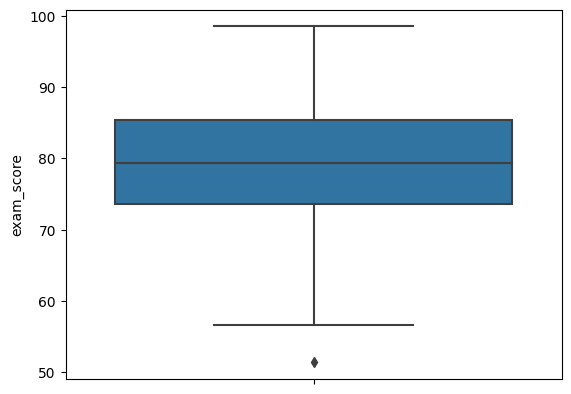

In [10]:
sns.boxplot(data=df_final, y="exam_score")

Then I'll just count some values

In [11]:
df_final['grant'].value_counts()

grant
0    191
1    148
Name: count, dtype: int64

In [12]:
df_final['country'].value_counts()

country
GERMAN            67
DUTCH             62
POLAND            45
SPAIN             26
ITALIA            24
FRANCE            23
BELGIUM           13
AUSTRIA           13
HUNGARY           11
ROMANIA           10
LITHUANIA          7
PORTUGUESE         7
GREECE             5
DENMARK            5
CZECH REPUBLIC     4
SLOVENIA           3
SWEDISH            3
IRELAND            3
FINLAND            3
CROATIA            3
BULGARIA           1
NORWAY             1
Name: count, dtype: Int64

# Descriptive Analysis

In [13]:
quantitative_cols = ['exam_score', 'grant']


for col in quantitative_cols:
    descriptive_stats = df_final[col].describe()
    skewness = df_final[col].skew()
    kurtosis = df_final[col].kurtosis()

    # Afficher les résultats
    print(f"Descriptive statistics for {col}:")
    print(descriptive_stats)
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print('-----------------------------')

Descriptive statistics for exam_score:
count    339.000000
mean      79.159853
std        8.585522
min       51.400000
25%       73.560000
50%       79.320000
75%       85.325000
max       98.500000
Name: exam_score, dtype: float64
Skewness: -0.22656090416246336
Kurtosis: -0.310211813006978
-----------------------------
Descriptive statistics for grant:
count    339.000000
mean       0.436578
std        0.496694
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: grant, dtype: float64
Skewness: 0.2568911912385532
Kurtosis: -1.9455200205409937
-----------------------------


**For the exam_score**

A skew of ~ -0.237 indicates that exam scores have a slight tendency to spread more towards lower values. This might suggest that a few students have scores significantly below average, but this is not a very pronounced trend.

A Kurtosis of ~ -0.310 indicates a somewhat flatter distribution of scores than normal, indicating less concentration around the mean and fewer extreme values. This means that students' scores are relatively homogeneous, with less extreme variation than would be expected in a normal distribution.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


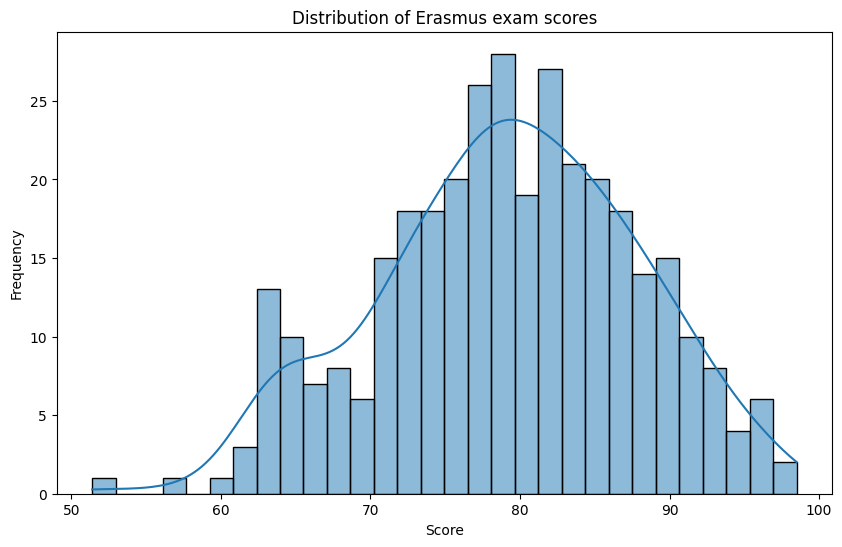

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df_final['exam_score'], kde=True, bins=30)
plt.title('Distribution of Erasmus exam scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

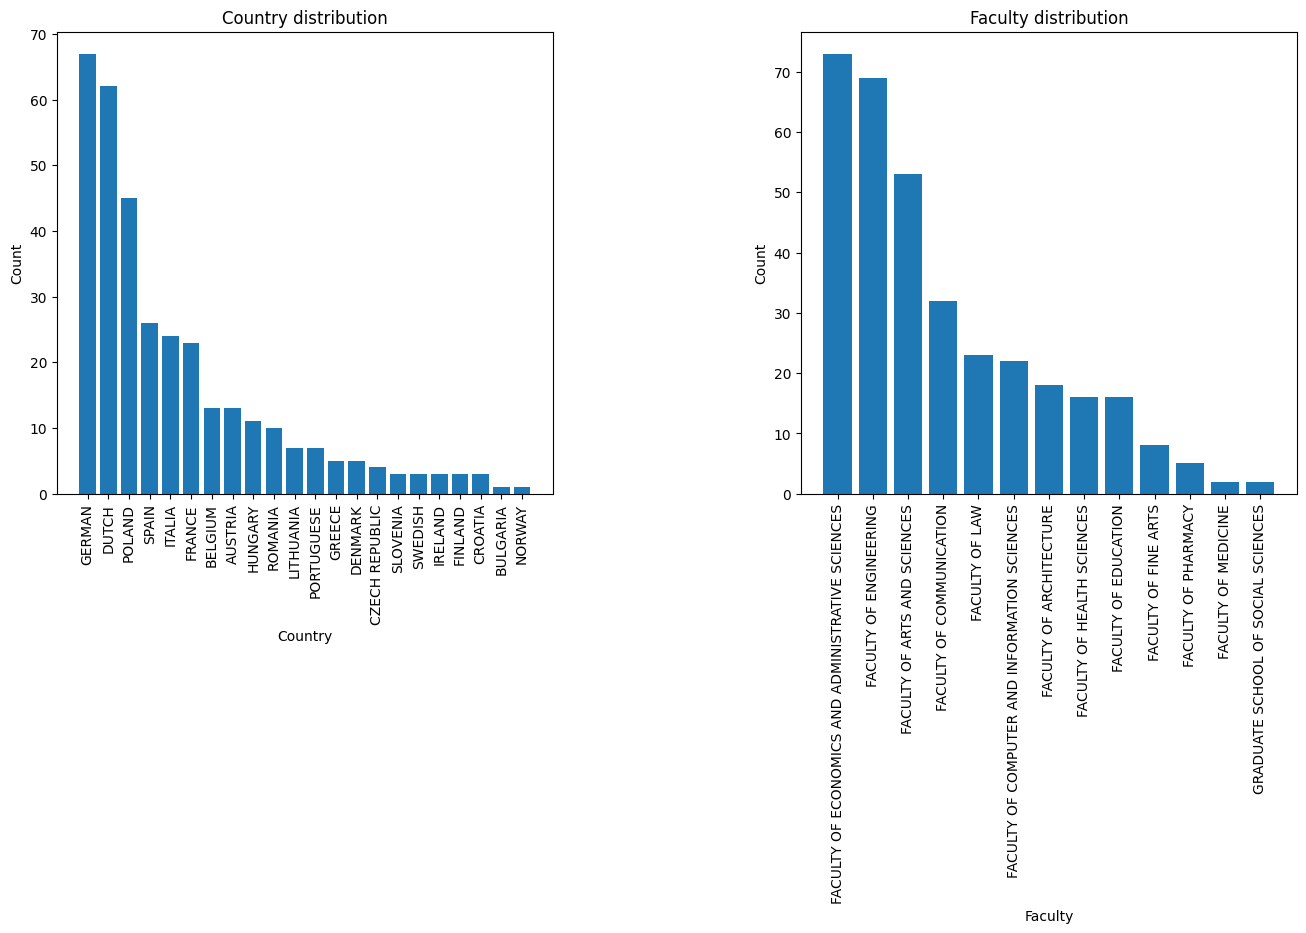

In [15]:
country_counts = df_final['country'].value_counts()
faculty_counts = df_final['faculty'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create a bar plot of the highest exam scores by country
ax1.bar(country_counts.index, country_counts.values)
ax1.set_xlabel('Country')
ax1.set_ylabel('Count')
ax1.set_title('Country distribution')
ax1.tick_params(axis='x', rotation=90)

# Create a scatter plot of countries and exam scores
ax2.bar(faculty_counts.index, faculty_counts.values)
ax2.set_xlabel('Faculty')
ax2.set_ylabel('Count')
ax2.set_title('Faculty distribution')
ax2.tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the plot
plt.show()

In [16]:
import math

mean_scores_by_country = df_final.groupby('country')['exam_score'].mean().sort_values().reset_index()
mean_scores_by_country.columns = ['Country', 'Average_Score']

mean_scores_by_country['Average_Score'] = mean_scores_by_country['Average_Score'].apply(lambda x: math.floor(x * 100) / 100)

mean_scores_by_country.head(10)

,Country,Average_Score
0,CROATIA,65.53
1,CZECH REPUBLIC,72.19
2,PORTUGUESE,73.86
3,NORWAY,74.77
4,HUNGARY,76.64
5,AUSTRIA,76.70
6,BELGIUM,76.86
7,ROMANIA,77.77
8,POLAND,77.91
9,DENMARK,78.83


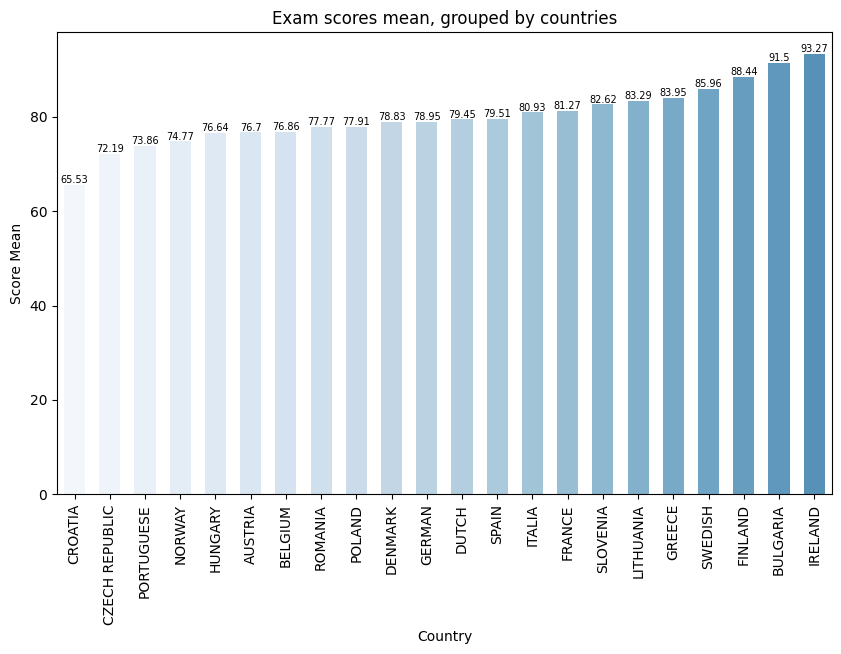

In [17]:
plt.figure(figsize=(10, 6))

bar = sns.barplot(mean_scores_by_country, 
            x='Country', 
            y='Average_Score', 
            width=.6, 
            palette=sns.color_palette("Blues", n_colors=35)
)

bar.bar_label(bar.containers[0], fontsize=7);

plt.title('Exam scores mean, grouped by countries')

plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Score Mean')
plt.show()

In [18]:
#Dictionnary with latitude and longitude of the countries, thanks to ChatGPT

capitals_coordinates = {
    "CROATIA": {"latitude": 45.8150, "longitude": 15.9819},
    "CZECH REPUBLIC": {"latitude": 50.0755, "longitude": 14.4378},
    "PORTUGUESE": {"latitude": 38.7223, "longitude": -9.1393},
    "NORWAY": {"latitude": 59.9139, "longitude": 10.7522},
    "HUNGARY": {"latitude": 47.4979, "longitude": 19.0402},
    "AUSTRIA": {"latitude": 48.2082, "longitude": 16.3738},
    "BELGIUM": {"latitude": 50.8503, "longitude": 4.3517},
    "ROMANIA": {"latitude": 44.4268, "longitude": 26.1025},
    "POLAND": {"latitude": 52.2297, "longitude": 21.0122},
    "DENMARK": {"latitude": 55.6761, "longitude": 12.5683},
    "GERMAN": {"latitude": 52.5200, "longitude": 13.4050},
    "DUTCH": {"latitude": 52.3676, "longitude": 4.9041},
    "SPAIN": {"latitude": 40.4168, "longitude": -3.7038},
    "ITALIA": {"latitude": 41.9028, "longitude": 12.4964},
    "FRANCE": {"latitude": 48.8566, "longitude": 2.3522},
    "SLOVENIA": {"latitude": 46.0569, "longitude": 14.5058},
    "LITHUANIA": {"latitude": 54.6872, "longitude": 25.2797},
    "GREECE": {"latitude": 37.9838, "longitude": 23.7275},
    "SWEDISH": {"latitude": 59.3293, "longitude": 18.0686},
    "FINLAND": {"latitude": 60.1695, "longitude": 24.9355},
    "BULGARIA": {"latitude": 42.6977, "longitude": 23.3219},
    "IRELAND": {"latitude": 53.3498, "longitude": -6.2603}
}

mean_scores_by_country['Latitude'] = mean_scores_by_country['Country'].map(lambda country: capitals_coordinates[country]['latitude'])
mean_scores_by_country['Longitude'] = mean_scores_by_country['Country'].map(lambda country: capitals_coordinates[country]['longitude'])

mean_scores_by_country.head(10)

,Country,Average_Score,Latitude,Longitude
0,CROATIA,65.53,45.8150,15.9819
1,CZECH REPUBLIC,72.19,50.0755,14.4378
2,PORTUGUESE,73.86,38.7223,-9.1393
3,NORWAY,74.77,59.9139,10.7522
4,HUNGARY,76.64,47.4979,19.0402
5,AUSTRIA,76.70,48.2082,16.3738
6,BELGIUM,76.86,50.8503,4.3517
7,ROMANIA,77.77,44.4268,26.1025
8,POLAND,77.91,52.2297,21.0122
9,DENMARK,78.83,55.6761,12.5683


In [19]:
import folium

europe_map = folium.Map(location = [51.165707, 10.452764], zoom_start=4)

for index, row in mean_scores_by_country.iterrows():
    infos = f"{row['Country']}: {row['Average_Score']} / 100"
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=infos).add_to(europe_map)


europe_map

In [20]:
total_count = df_final.groupby('country').size()
grant_count = df_final[df_final['grant'] == 1].groupby('country').size();

grant_rate_by_country = (grant_count / total_count * 100).reset_index()

grant_rate_by_country.columns = ['country', 'grant_rate']
grant_rate_by_country['grant_rate'] = grant_rate_by_country['grant_rate'].fillna(0)
grant_rate_by_country['grant_rate'] = grant_rate_by_country['grant_rate'].apply(lambda x: math.floor(x * 100) / 100)
grant_rate_by_country = grant_rate_by_country.sort_values(by=['grant_rate'])

grant_rate_by_country.head(10)

,country,grant_rate
3,CROATIA,0.00
4,CZECH REPUBLIC,0.00
15,NORWAY,0.00
18,ROMANIA,20.00
17,PORTUGUESE,28.57
0,AUSTRIA,30.76
11,HUNGARY,36.36
5,DENMARK,40.00
9,GERMAN,40.29
16,POLAND,42.22


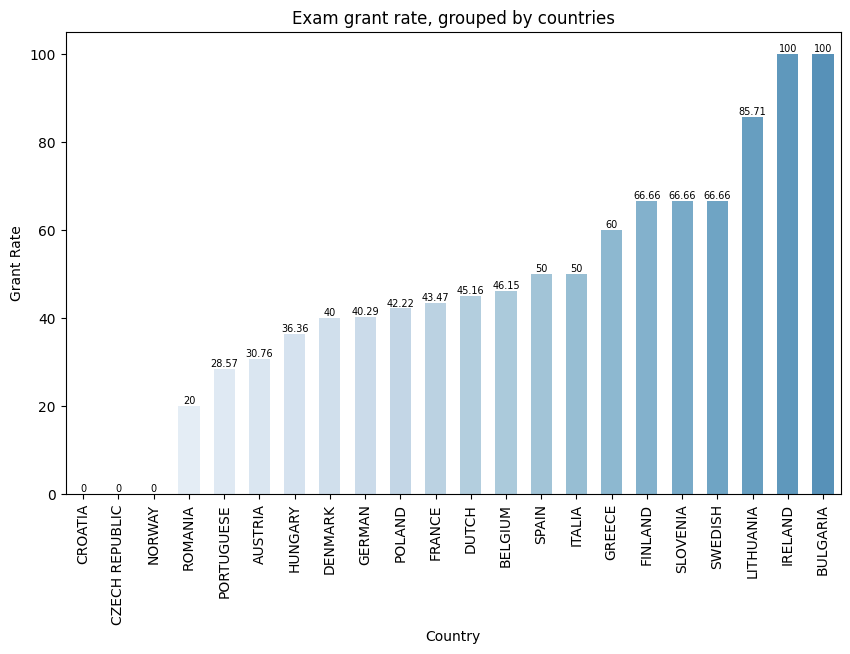

In [21]:
plt.figure(figsize=(10, 6))

bar = sns.barplot(grant_rate_by_country, 
            x='country', 
            y='grant_rate', 
            width=.6, 
            palette=sns.color_palette("Blues", n_colors=35)
)

bar.bar_label(bar.containers[0], fontsize=7);

plt.title('Exam grant rate, grouped by countries')

plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Grant Rate')
plt.show()

**Checking this result, we might think that Bulgaria ; Ireland and Lithuania are really great, I'll count the number of students in these countries to see if it isn't just a low number of good students**

**Same for Croatia ; Czech Republic ; Norway and Romania**

In [22]:
print("High grant rate :")
print(f"Number of students in Bulgaria : {total_count['BULGARIA']}")
print(f"Number of students in Ireland : {total_count['IRELAND']}")
print(f"Number of students in Lithuania : {total_count['LITHUANIA']}")
print("-------------------")
print('Low grant rate :')
print(f"Number of students in Croatia : {total_count['CROATIA']}")
print(f"Number of students in Czech Republic : {total_count['CZECH REPUBLIC']}")
print(f"Number of students in Norway : {total_count['NORWAY']}")
print(f"Number of students in Romania : {total_count['ROMANIA']}")

High grant rate :
Number of students in Bulgaria : 1
Number of students in Ireland : 3
Number of students in Lithuania : 7
-------------------
Low grant rate :
Number of students in Croatia : 3
Number of students in Czech Republic : 4
Number of students in Norway : 1
Number of students in Romania : 10


**Well, with only one and three students, Bulgaria and Ireland are not really trustworthy, same for Croatia ; Czech republic and Norway with 3 ; 4 and 1 student**

**For Lithuania and Romania, they seem more trustworthy with their rates**